<a href="https://colab.research.google.com/github/Nadia01cg-bit/Data-Analytics/blob/main/Pima_Indian_Diabetes_classification_Nadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><span style='background :#F5EEF3' >  Diabetes Prediction

# <span style='background :#F5EEF3' > Background

Pada tahun 2021, International Diabetes Federation (IDF) mencatat 537  juta orang dewasa (umur 20 - 79 tahun) atau 1 dari 10 orang hidup
dengan diabetes di seluruh dunia. Diabetes juga menyebabkan 6,7 juta  kematian atau 1 tiap 5 detik.

Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data.

Secara khusus, semua pasien di sini adalah perempuan berusia minimal 21 tahun keturunan India Pima.

# <span style='background :#F5EEF3' > Importing Libraries and Loading Data   
    
    
    

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns



pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')
import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
# this eliminates the requirement to use plt.show() after every plot
%matplotlib inline

# changing the default figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
# Python libraries


# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold
from xgboost import XGBClassifier


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time

import warnings
warnings.filterwarnings('ignore')

# <span style='background :#F5EEF3' > Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/Copy of Dataset9_Diabetes_Prediction.csv")

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

# <span style='background :#F5EEF3' > Data Cleaning and Data Preprocessing



* Mengubah kolom menjadi lower case agar memudahkan penulisan



In [ ]:
df = df.rename(columns=str.lower)
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



* Drop data yang duplicate



In [ ]:
df=df.drop_duplicates()

* Mengecek jumlah data

In [ ]:
len(df)

768

* Mengecek setiap uniqe value dari setiap kolom dataset

In [ ]:
df.nunique()

pregnancies                  17
glucose                     136
bloodpressure                47
skinthickness                51
insulin                     186
bmi                         248
diabetespedigreefunction    517
age                          52
outcome                       2
dtype: int64

* mengecek apakah ada data yang null

In [ ]:
df.isnull().sum()


# next check apakah ada zeros value

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

tidak ada null value

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* Mengecek berapa jumlah nilai  0 dalam setiap kolom

In [ ]:
for column_name in df.columns:
  column = df[column_name]
  # Get the count of Zeros in column
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is : ', count)




Count of zeros in column  pregnancies  is :  111
Count of zeros in column  glucose  is :  5
Count of zeros in column  bloodpressure  is :  35
Count of zeros in column  skinthickness  is :  227
Count of zeros in column  insulin  is :  374
Count of zeros in column  bmi  is :  11
Count of zeros in column  diabetespedigreefunction  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  outcome  is :  500


banyak zeros value,
- hasil research -> beberapa zeros values merupakan tanda dari missing values

In [ ]:
cols = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
zero1 = df[df['glucose'] == 0]
zero2 = df[df['bloodpressure'] == 0]
zero3 = df[df['skinthickness'] == 0]
zero4 = df[df['insulin'] == 0]
zero5 = df[df['bmi'] == 0]
zeros = [zero1, zero2, zero3, zero4, zero5]


for i in range (5) :
  pct = round(len(zeros[i])/len(df[cols[i]])*100,2)
  print(f'Percentage of zero values in {cols[i]} column is {pct} %')

# for i in range(5):
#   pct = round(len(zeros[i])/len(df_eda[cols[i]])*100,2)
#   print(f'Percentage of zero values in {cols[i]} column is {pct} %')

Percentage of zero values in glucose column is 0.65 %
Percentage of zero values in bloodpressure column is 4.56 %
Percentage of zero values in skinthickness column is 29.56 %
Percentage of zero values in insulin column is 48.7 %
Percentage of zero values in bmi column is 1.43 %


insulin memiliki proporsi zeros value terbanyak - hal ini merupakan null values yang harus diatasi karena kemungkinan kecil insulin bernilai 0







Mengetahui jumlah kolom yang zero values
tidak termasuk jumlah pregnancies yang berarti tidak pernah melahirkan


# <span style='background :#F5EEF3'> Exploratory Data Analysis EDA
        
        


* Mengetahui karakteristik persebaran setiap variabel sebelum melakukan imputasi zero values

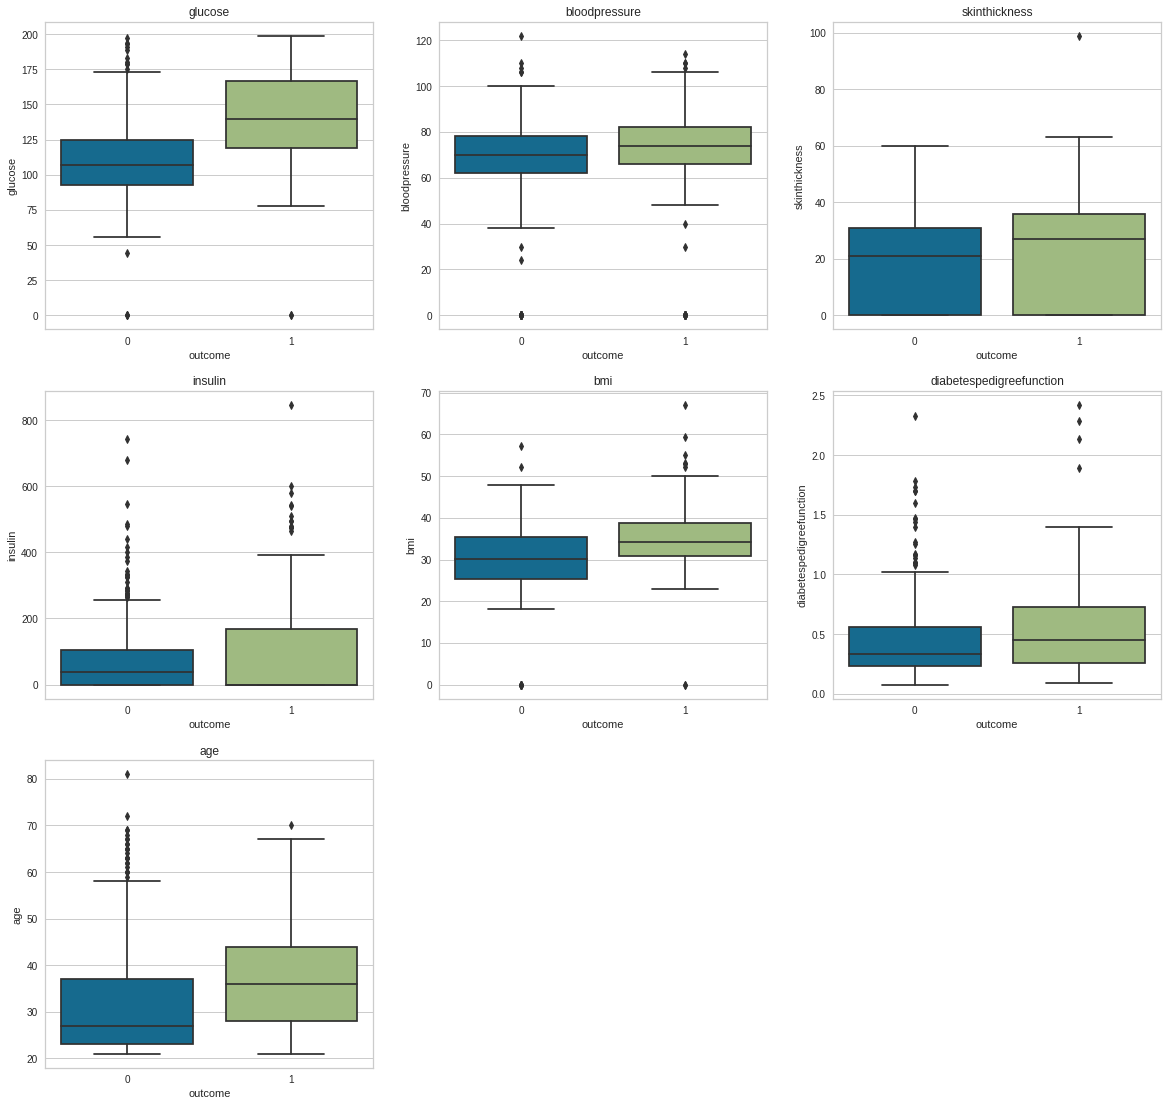

In [ ]:
N_col = ['glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=df[col],x=df['outcome'])
    plt.title(col)
    plotnum+=1
plt.show()




Grafik box plot menunjukan seberapa banyak outlier sebelum diiimpute

- > masih banyak outlier terutama pada variabel insulin

In [ ]:
# #membuat beberpa zeros value menjadi null values untuk imputation

# cols = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
# df[cols] = df[cols].replace(['0', 0], np.nan)
# df.isnull().sum()

melakukan imputasi dengan knn imputer pada data yang bernilai 0

In [ ]:
from sklearn.impute import KNNImputer
knn_impute = KNNImputer(missing_values=0)
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age']] = knn_impute.fit_transform(df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age']])


In [ ]:
cols = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
zero1 = df[df['glucose'] == 0]
zero2 = df[df['bloodpressure'] == 0]
zero3 = df[df['skinthickness'] == 0]
zero4 = df[df['insulin'] == 0]
zero5 = df[df['bmi'] == 0]
zeros = [zero1, zero2, zero3, zero4, zero5]


for i in range (5) :
  pct = round(len(zeros[i])/len(df[cols[i]])*100,2)
  print(f'Percentage of zero values in {cols[i]} column is {pct} %')

# for i in range(5):
#   pct = round(len(zeros[i])/len(df_eda[cols[i]])*100,2)
#   print(f'Percentage of zero values in {cols[i]} column is {pct} %')

Percentage of zero values in glucose column is 0.0 %
Percentage of zero values in bloodpressure column is 0.0 %
Percentage of zero values in skinthickness column is 0.0 %
Percentage of zero values in insulin column is 0.0 %
Percentage of zero values in bmi column is 0.0 %


In [ ]:
for column_name in df.columns:
  column = df[column_name]
  # Get the count of Zeros in column
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is : ', count)



Count of zeros in column  pregnancies  is :  111
Count of zeros in column  glucose  is :  0
Count of zeros in column  bloodpressure  is :  0
Count of zeros in column  skinthickness  is :  0
Count of zeros in column  insulin  is :  0
Count of zeros in column  bmi  is :  0
Count of zeros in column  diabetespedigreefunction  is :  0
Count of zeros in column  age  is :  0
Count of zeros in column  outcome  is :  500


Hasil dari dataset yang telah dilakukan imputasi. Sudah tidak terdapat zero values pada kolom glukosa, bloodpressur, skinthickness, insulin, dan bmi.

In [ ]:
len(df)

768

In [ ]:
df.describe().T
#df data setelah  imputation

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,121.601562,30.494403,44.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,72.325781,12.193908,24.000,64.00000,72.0000,80.00000,122.00
skinthickness,768.0,29.096615,9.424697,7.000,23.00000,29.0000,35.00000,99.00
insulin,768.0,152.724479,98.502206,14.000,87.45000,131.6000,191.05000,846.00
bmi,768.0,32.434479,6.883819,18.200,27.50000,32.1900,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## FEATURE VS TARGET

Jumlah orang yang memilki diabetes : 	268
Jumlah orang yang tidak memilki diabetes : 	500
 Presentase Diabetes :	34.9 %
 Presentase Tidak Diabetes :	65.1 %


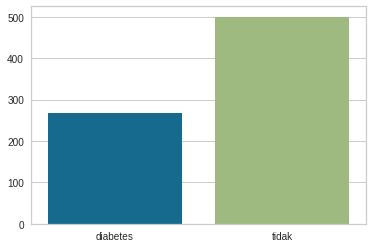

In [ ]:
#output
## visualisasi outcome


diabetes = df[df['outcome']==1]
tidak  = df[~ (df['outcome']==1)]


print ("Jumlah orang yang memilki diabetes : \t" + str(len(diabetes)))
print ("Jumlah orang yang tidak memilki diabetes : \t" + str(len(tidak)))

sns.barplot(x=['diabetes','tidak'], y= [len(diabetes),len(tidak)])

print(" Presentase Diabetes :\t" + str(round(len(diabetes)*100/len(df),2))+ " %")
print(" Presentase Tidak Diabetes :\t" + str(round(len(tidak)*100/len(df), 2))+ " %")



melihat persebaran data dan outlier  yang telah diimpute

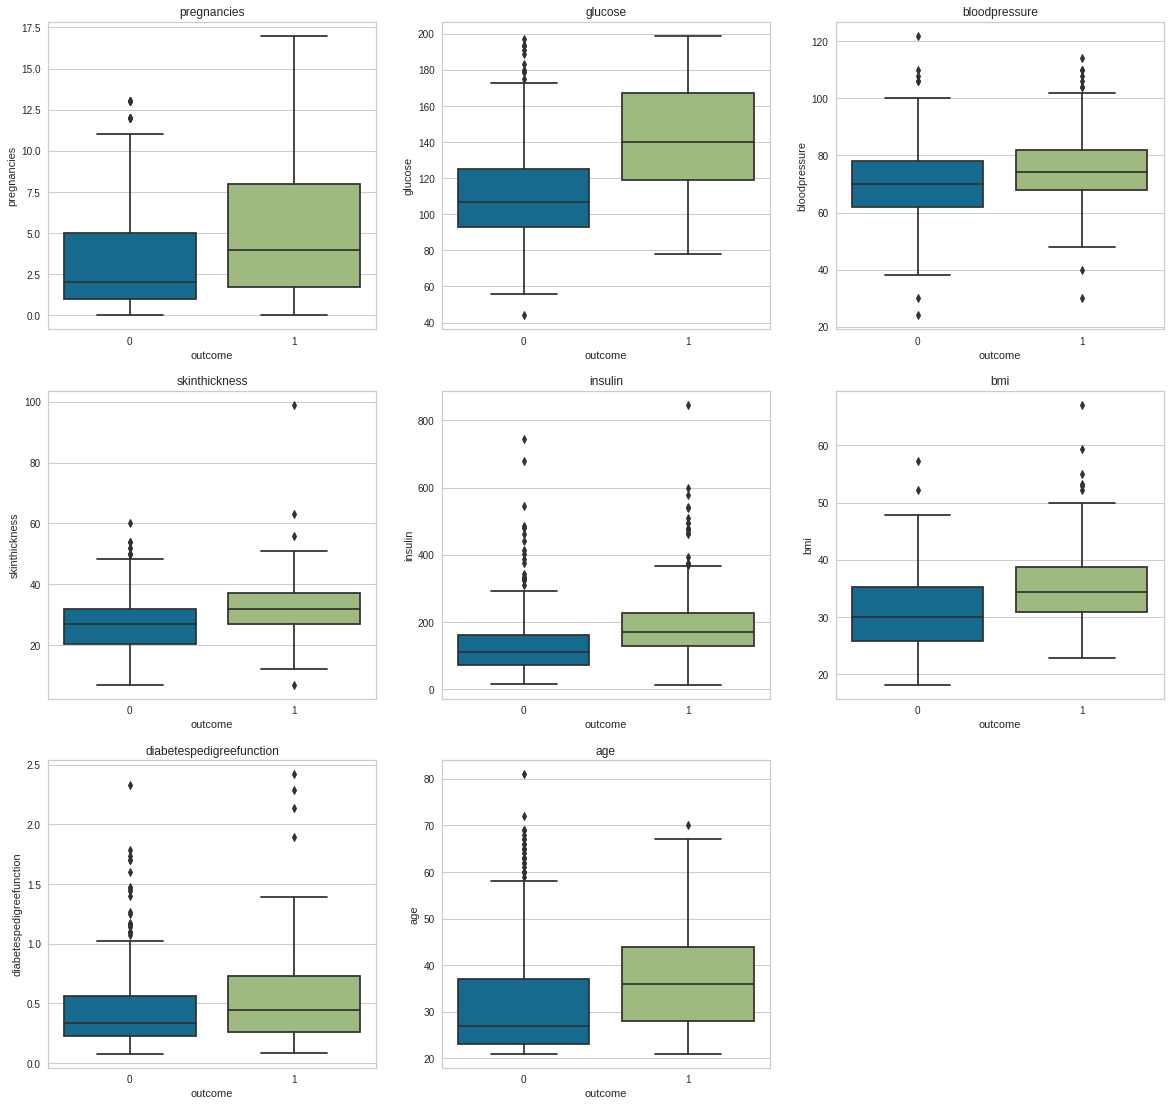

In [ ]:
N_col = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=df[col],x=df['outcome'])
    plt.title(col)
    plotnum+=1
plt.show()

melihat persebaran data per variabel  pada masing-masing outcome

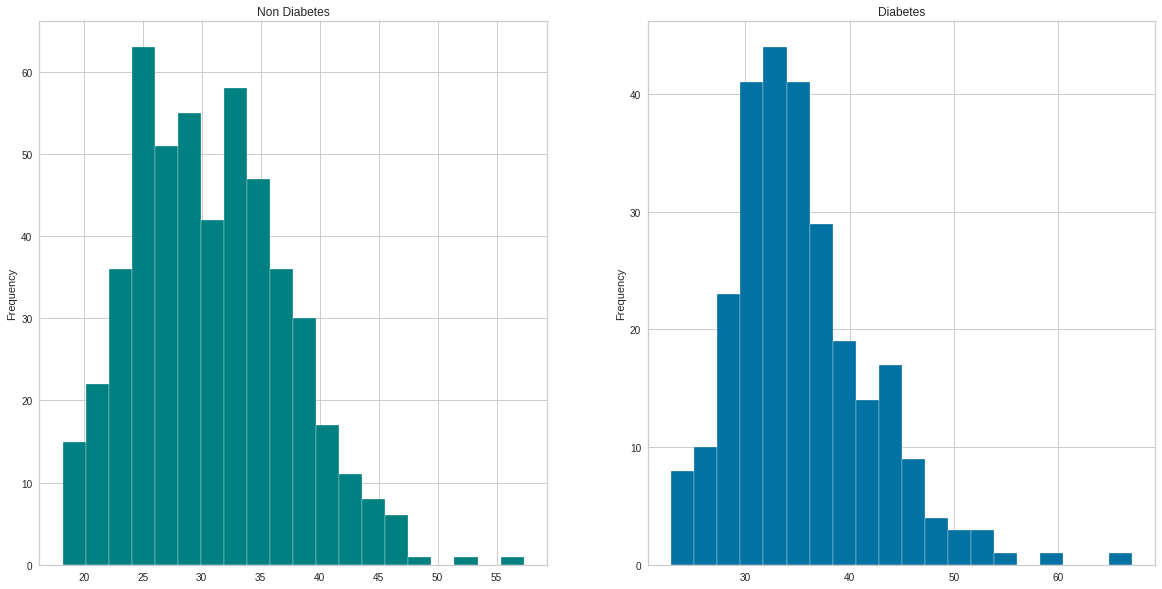

In [ ]:
# df.hist(column='bmi', by='outcome')
# plt.title("Linear graph")
# plt.show()

f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].bmi.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].bmi.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

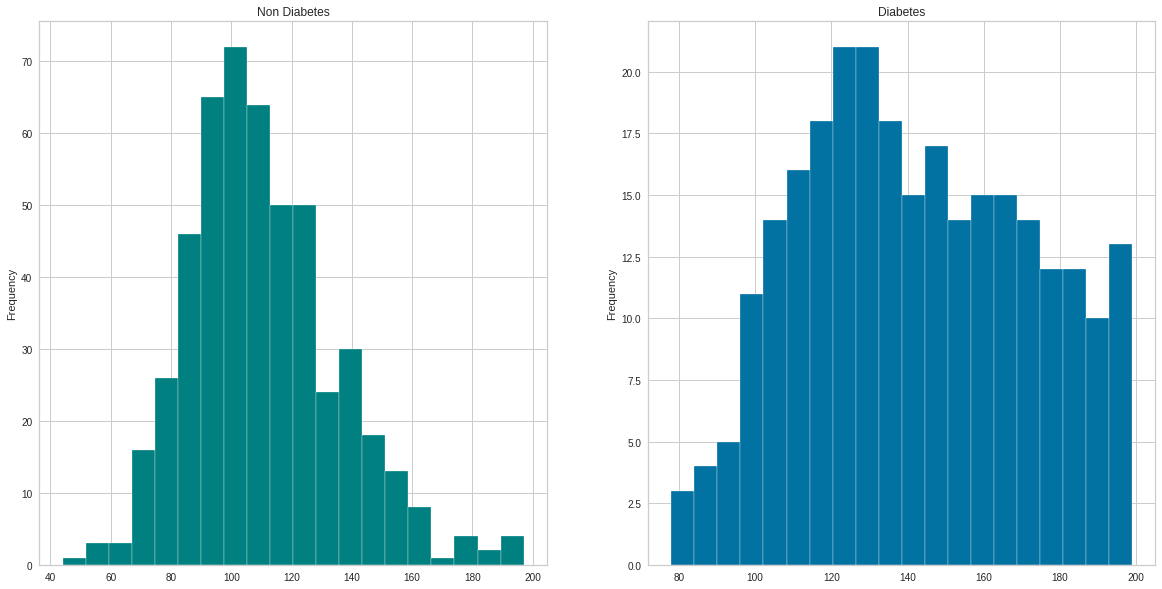

In [ ]:
# df.hist(column='glucose', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].glucose.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].glucose.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

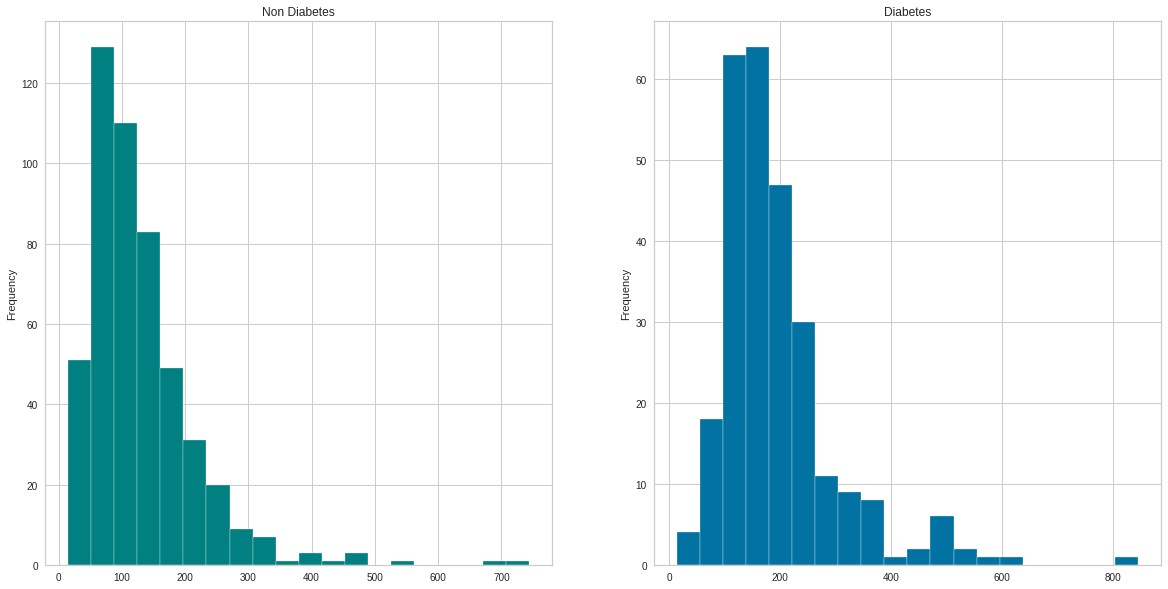

In [ ]:
# df.hist(column='insulin', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].insulin.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].insulin.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

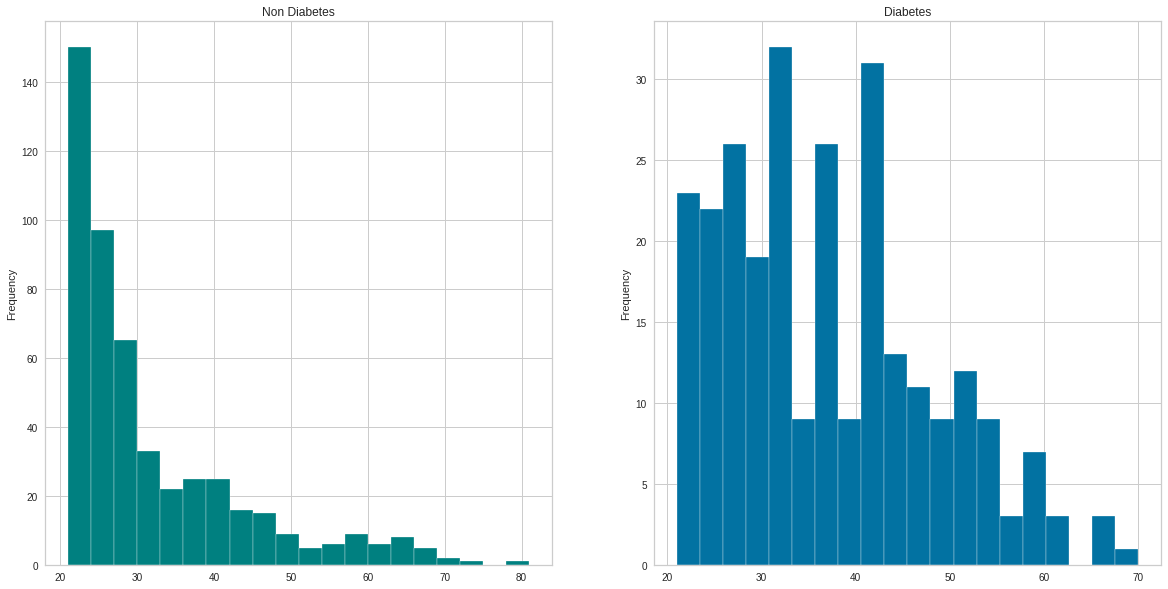

In [ ]:
# df.hist(column='age', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].age.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

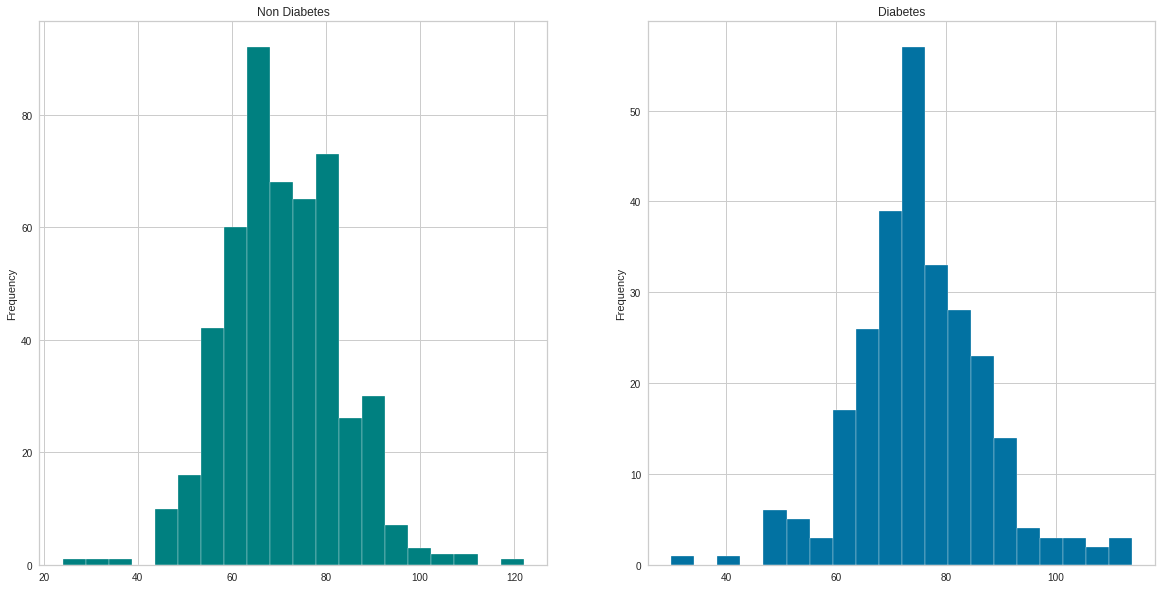

In [ ]:
# df.hist(column='bloodpressure', by='outcome')
# df.hist(column='glucose', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].bloodpressure.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].bloodpressure.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()


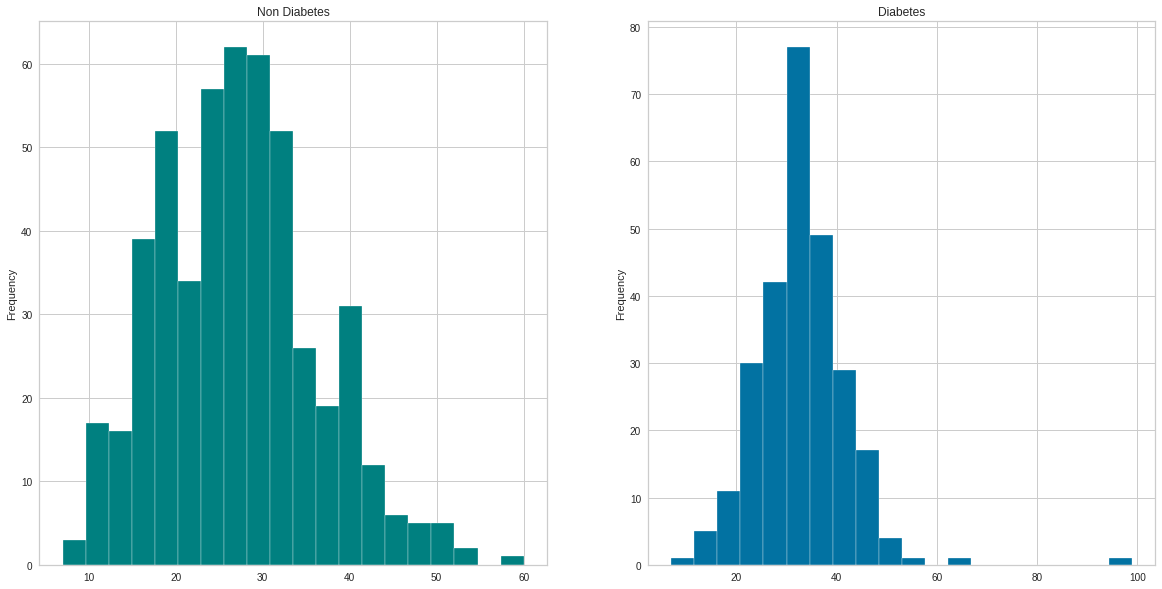

In [ ]:
# df.hist(column='skinthickness', by='outcome')
# df.hist(column='glucose', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].skinthickness.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].skinthickness.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

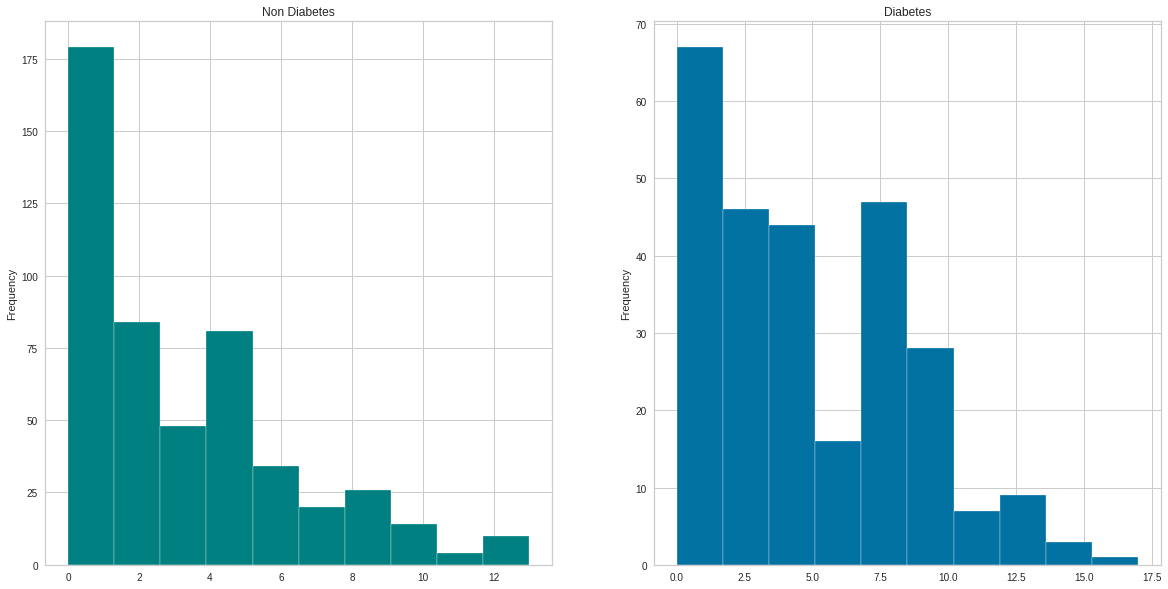

In [ ]:
# df.hist(column='pregnancies', by='outcome')
# df.hist(column='glucose', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].pregnancies.plot.hist(ax=ax[0], edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].pregnancies.plot.hist(ax=ax[1], edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()


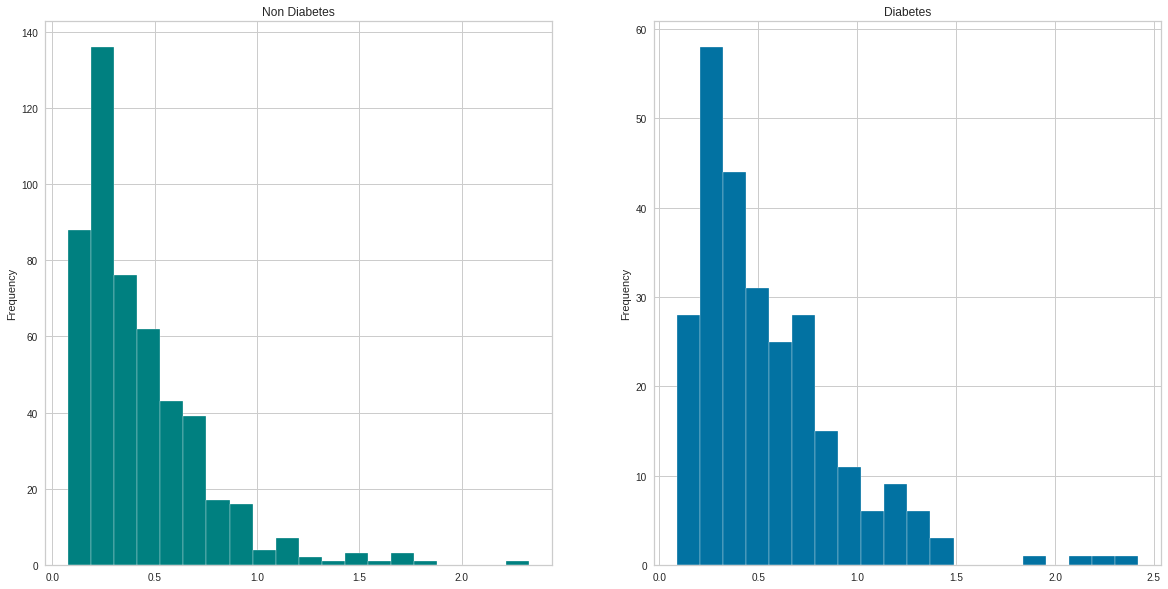

In [ ]:
# df.hist(column='diabetespedigreefunction', by='outcome')
# df.hist(column='glucose', by='outcome')
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['outcome']==0].diabetespedigreefunction.plot.hist(ax=ax[0],bins=20,edgecolor='white', color = "teal")
ax[0].set_title('Non Diabetes')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
df[df['outcome']==1].diabetespedigreefunction.plot.hist(ax=ax[1], bins=20,edgecolor='white')
ax[1].set_title('Diabetes')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
plt.show()

## Handling outliers

In [ ]:
# df[df["bloodpressure"] > 100 ]
# df[df["bloodpressure"] < 40 ]

# df.drop(df[df["bloodpressure"] > 0.8].index, inplace = True)

# df[df["insulin"] > 100 ]

def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df,'insulin')
#Input the dataset and the required column

The IQR is 103.60000000000002
The lower bound value is -67.95000000000005
The upper bound value is 346.45000000000005
Total number of outliers are 33


In [ ]:
df[df["insulin"] > 400 ]
df.drop(df[df["insulin"] > 400 ].index, inplace = True)

In [ ]:
out_iqr(df,'glucose')
df.drop(df[df["glucose"] > 196] .index, inplace = True)

The IQR is 39.0
The lower bound value is 40.5
The upper bound value is 196.5
Total number of outliers are 4


In [ ]:
out_iqr(df,'skinthickness')

The IQR is 11.549999999999997
The lower bound value is 5.525000000000006
The upper bound value is 51.724999999999994
Total number of outliers are 7


In [ ]:
df[df["skinthickness"] > 52 ]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31.0,0
86,13,106.0,72.0,54.0,160.4,36.6,0.178,45.0,0
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25.0,1
211,0,147.0,85.0,54.0,329.2,42.8,0.375,24.0,0
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25.0,1


In [ ]:
df.drop(df[df["skinthickness"] > 52 ].index, inplace = True)

In [ ]:
out_iqr(df,'diabetespedigreefunction')

The IQR is 0.37
The lower bound value is -0.31199999999999994
The upper bound value is 1.168
Total number of outliers are 28


In [ ]:
df[df["diabetespedigreefunction"] > 1.2 ].count()

pregnancies                 25
glucose                     25
bloodpressure               25
skinthickness               25
insulin                     25
bmi                         25
diabetespedigreefunction    25
age                         25
outcome                     25
dtype: int64

In [ ]:
df.drop(df[df["diabetespedigreefunction"] > 1.2 ].index, inplace = True)

In [ ]:
out_iqr(df,'age')

The IQR is 16.0
The lower bound value is 0.0
The upper bound value is 64.0
Total number of outliers are 15


In [ ]:
df[df["age"] > 64 ] # dari dataset outlier age sekilas tidak terlalu merepresentasikan output


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
123,5,132.0,80.0,24.6,221.2,26.8,0.186,69.0,0
148,5,147.0,78.0,26.2,216.6,33.7,0.218,65.0,0
221,2,158.0,90.0,30.0,188.6,31.6,0.805,66.0,1
294,0,161.0,50.0,25.4,232.0,21.9,0.254,65.0,0
362,5,103.0,108.0,37.0,114.0,39.2,0.305,65.0,0
363,4,146.0,78.0,26.2,227.6,38.5,0.520,67.0,1
453,2,119.0,82.8,22.4,244.4,19.6,0.832,72.0,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81.0,0
495,6,166.0,74.0,30.4,211.0,26.6,0.304,66.0,0
537,0,57.0,60.0,31.8,108.4,21.7,0.735,67.0,0


In [ ]:
df.drop(df[df["age"] > 64 ].index, inplace = True)

Mengecek persebaran data  setelah outlier ditake out

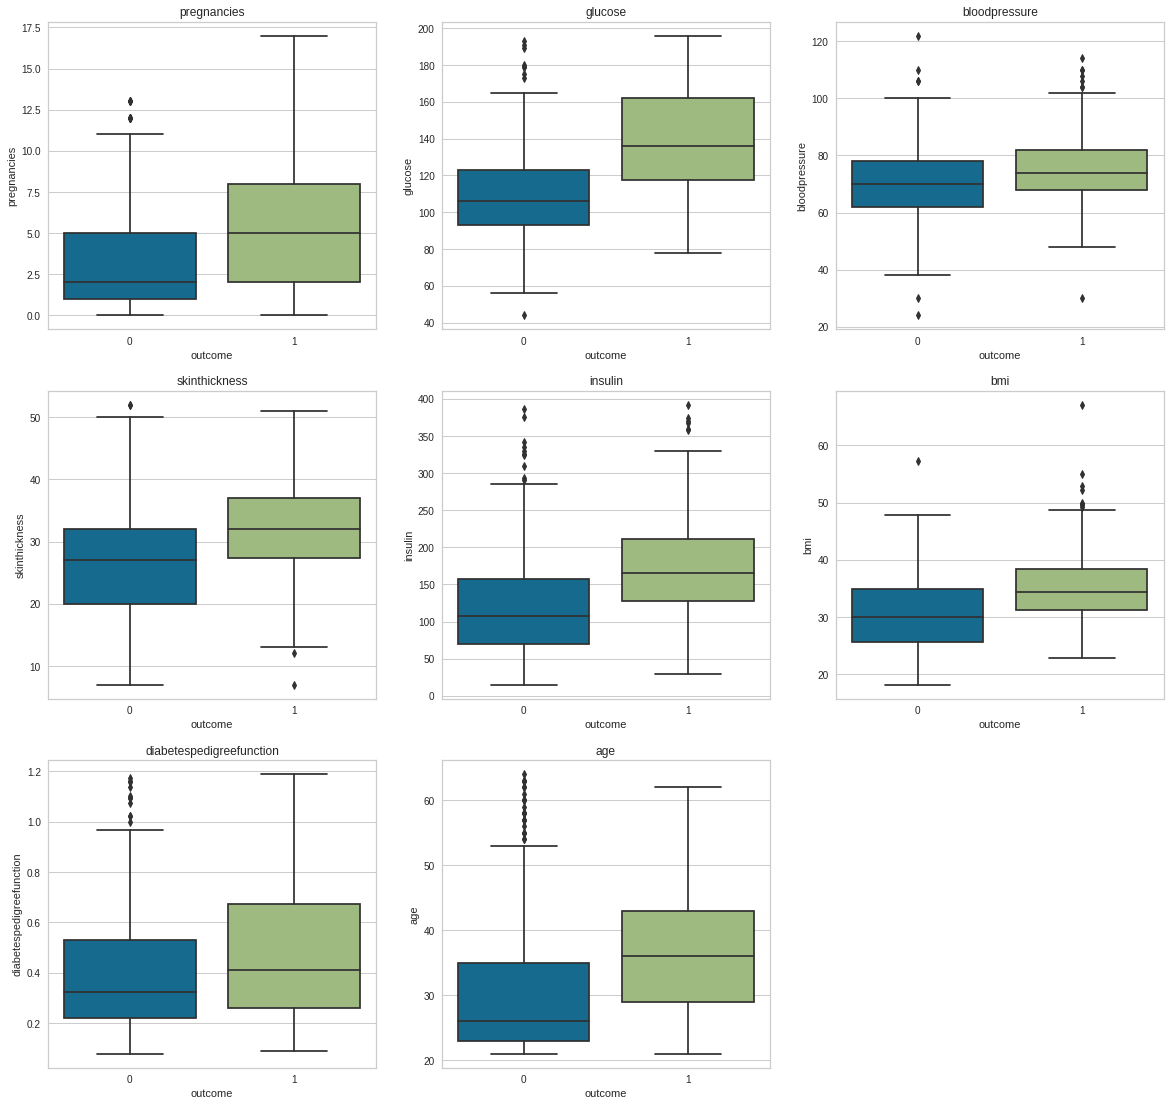

In [ ]:
N_col = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=df[col],x=df['outcome'])
    plt.title(col)
    plotnum+=1
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               697 non-null    int64  
 1   glucose                   697 non-null    float64
 2   bloodpressure             697 non-null    float64
 3   skinthickness             697 non-null    float64
 4   insulin                   697 non-null    float64
 5   bmi                       697 non-null    float64
 6   diabetespedigreefunction  697 non-null    float64
 7   age                       697 non-null    float64
 8   outcome                   697 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 70.6 KB


In [ ]:
len(df)
# terlihat total outlier  yang sebelumnya 768 berkurang

697

In [ ]:
768 - 697 # total data yang terbuang

71

In [ ]:
(768-697)*100/768 # sekitar 9% data ditake out  = masih dapat merepresentasikan data keseluruhan

9.244791666666666

Melihat persebaran data ketika outlier telah ditake out

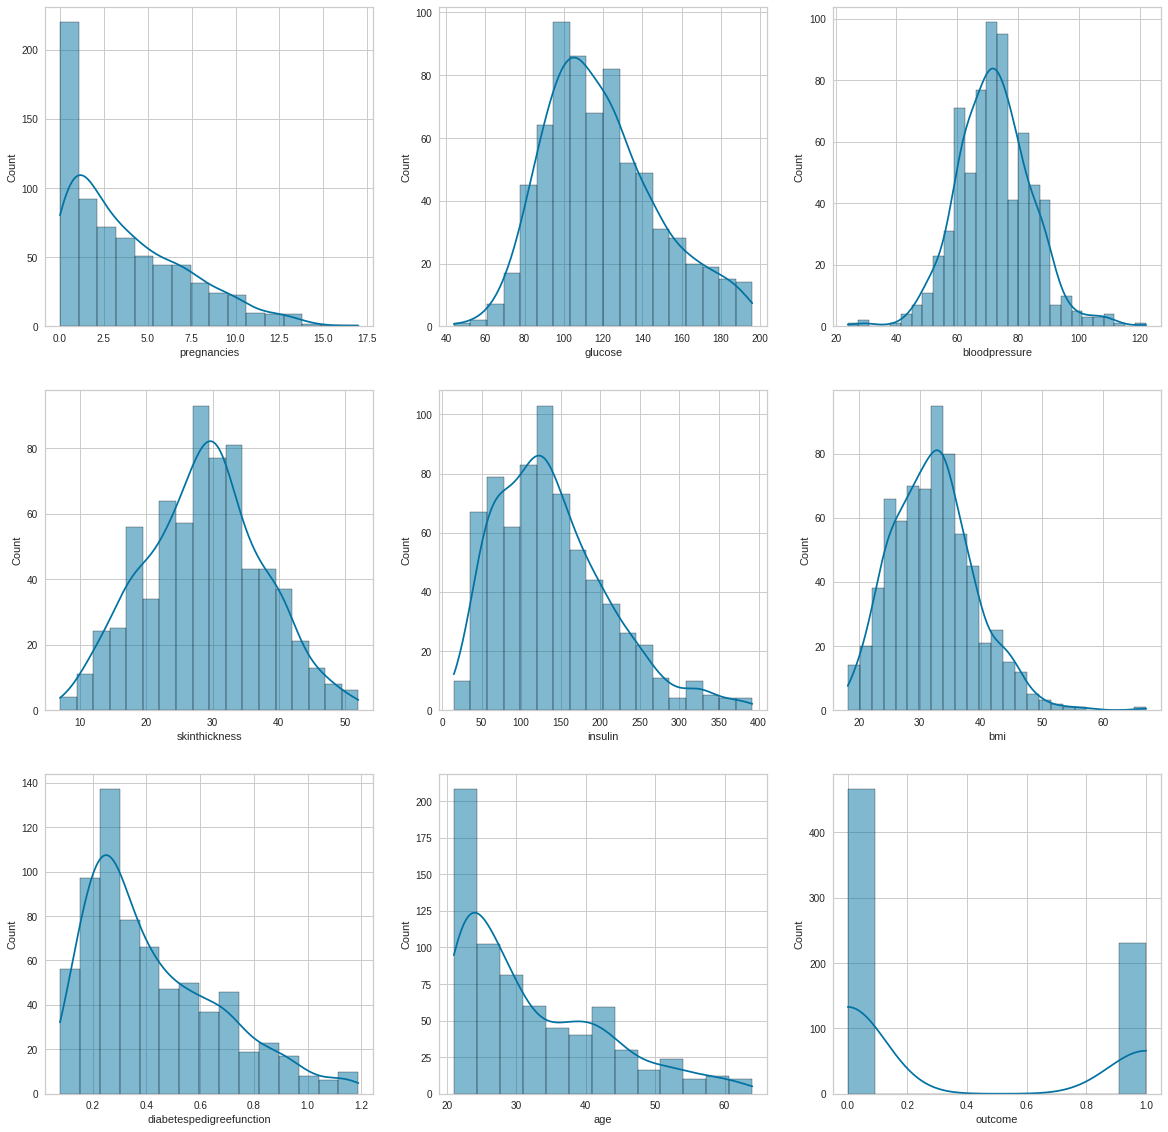

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
cols = df.columns

for i in range(len(cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[cols[i]], kde=True)



Melihat korelasi setiap data numerik

In [ ]:
korelasi = df.corr()
korelasi

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.163753,0.215769,0.154286,0.119524,0.072120,0.013420,0.589772,0.255554
glucose,0.163753,1.000000,0.244907,0.199774,0.648245,0.215694,0.091823,0.274170,0.495769
bloodpressure,0.215769,0.244907,1.000000,0.245784,0.183131,0.298834,0.028589,0.355509,0.194310
skinthickness,0.154286,0.199774,0.245784,1.000000,0.250462,0.662345,0.073642,0.185694,0.293457
insulin,0.119524,0.648245,0.183131,0.250462,1.000000,0.297601,0.107149,0.276094,0.362792
bmi,0.072120,0.215694,0.298834,0.662345,0.297601,1.000000,0.135542,0.102285,0.320128
diabetespedigreefunction,0.013420,0.091823,0.028589,0.073642,0.107149,0.135542,1.000000,0.059364,0.162297
age,0.589772,0.274170,0.355509,0.185694,0.276094,0.102285,0.059364,1.000000,0.283187
outcome,0.255554,0.495769,0.194310,0.293457,0.362792,0.320128,0.162297,0.283187,1.000000


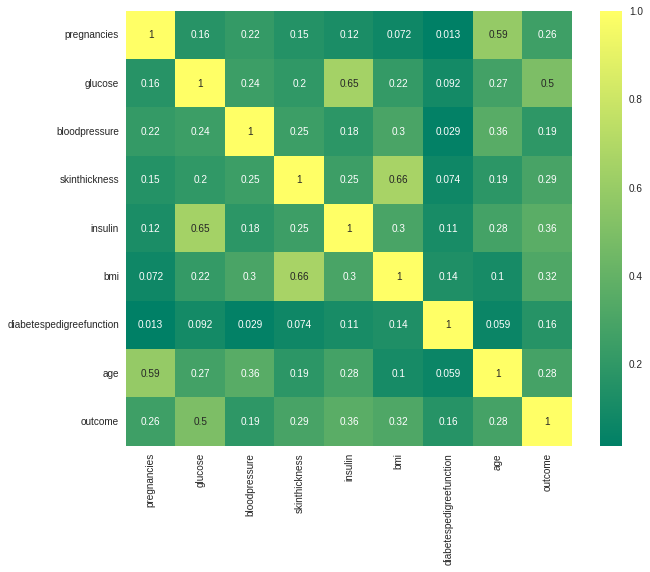

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, annot=True, cmap="summer")
plt.show()

terlihat korelasi yang paling tinggi adalah glukosa, disimpulkan tidak ada multikolinearitas antar variabel karena setiap variabel memiliki korelasi yang tidak tinggi (<0.7)

# Data Preparation for Modeling  

In [ ]:
df_prep = df.copy()

In [ ]:
# Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_prep)
df_prep = pd.DataFrame(mm.transform(df_prep),
                                 columns=df_prep.columns)
df_prep.head()


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,0.352941,0.684211,0.489796,0.622222,0.408488,0.314928,0.494149,0.674419,1.0
1,0.058824,0.269737,0.428571,0.488889,0.115650,0.171779,0.245725,0.232558,0.0
2,0.470588,0.914474,0.408163,0.364444,0.423342,0.104294,0.534653,0.255814,1.0
3,0.058824,0.296053,0.428571,0.355556,0.209549,0.202454,0.080108,0.000000,0.0
4,0.294118,0.473684,0.510204,0.293333,0.220159,0.151329,0.110711,0.209302,0.0


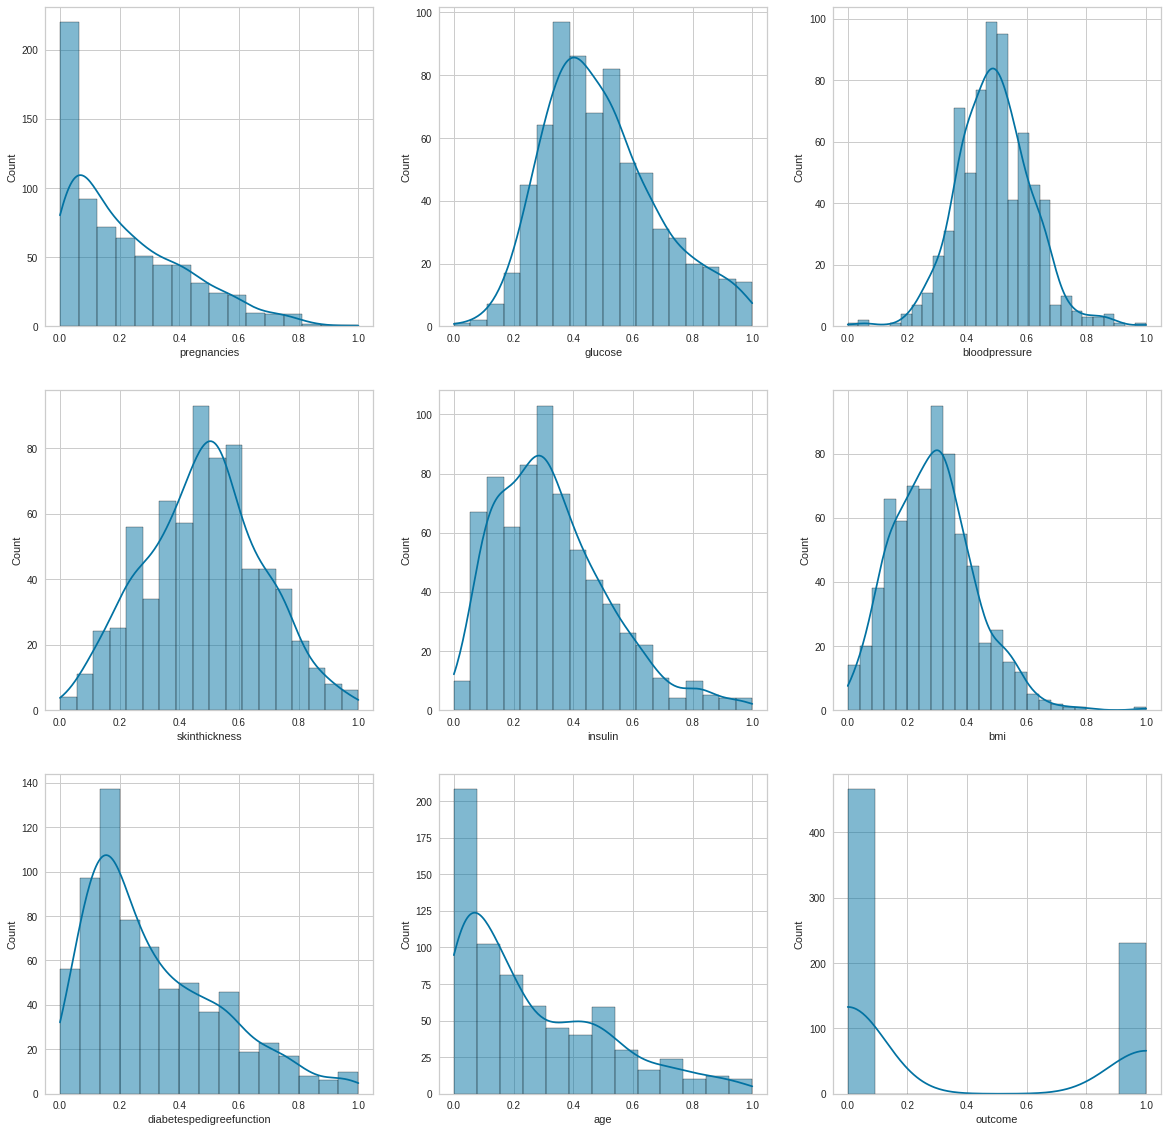

In [ ]:
# check distribusi gaussian

fig, axes = plt.subplots(4,2,figsize=(20,20))
cols = df_prep.columns

for i in range(len(cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_prep[cols[i]], kde=True)



sudah terdistribusi lebih baik dibandingkan sebelum di normalisasi  

In [ ]:
#  Train-Tes Split Data Feature Selection

X = df_prep.drop(columns=['outcome','pregnancies']).copy()
y = df_prep['outcome'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(557, 7) (557,)
(140, 7) (140,)


In [ ]:
X_train.tail()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
71,0.447368,0.428571,0.333333,0.227586,0.139059,0.206121,0.069767
106,0.223684,0.244898,0.364444,0.157029,0.316973,0.518452,0.093023
270,0.657895,0.346939,0.577778,0.318302,0.274029,0.309631,0.093023
435,0.269737,0.346939,0.333333,0.090186,0.196319,0.205221,0.162791
102,0.210526,0.387755,0.520000,0.084881,0.323108,0.281728,0.093023


# Model Development

In [ ]:
#  Logistic Regression, KNN, Random Forest, XGBOOST,
#SVC, Decision tree, ExtraTreesClassifier, LightGBM,naive bayes
# ADABOOST, GRADIENT BOOST
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
from sklearn.naive_bayes import GaussianNB
from sklearn.utils._testing import ignore_warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier



Fitting data dengan model
- logistic regression
- random forest
- svc
- knn
- decision tree
- xgboost
- naive bayes
- ada boost
- gradient boost
- extra tree classifier

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

# parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
#               {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = svc,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters for SVC : {grid_search.best_params_}")
# print(f"Best score for SVC : {grid_search.best_score_}")


In [ ]:
svc=SVC(probability = True)
# svc = SVC(probability = True)
svc.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
# svc = SVC(kernel = 'linear', C = 10)
# svc.fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# max_class = np.max(np.bincount(y_train))
# grid_param = {'n_neighbors': range(1, max_class)}
# knn = KNeighborsClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
# clf = GridSearchCV(knn, grid_param, cv=cv, scoring='accuracy')
# clf.fit(X,y)
# print("Best Estimator: \n{}\n".format(clf.best_estimator_))
# print("Best Parameters: \n{}\n".format(clf.best_params_))
# print("Best Score: \n{}\n".format(clf.best_score_))




In [ ]:

test_knn = []
train_knn = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_knn.append(knn.score(X_train,y_train))
    test_knn.append(knn.score(X_test,y_test))





In [ ]:
max_test_score = max(test_knn)
test_scores_ind = [i for i, v in enumerate(test_knn) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.28571428571428 % and k = [10]


In [ ]:
knn = KNeighborsClassifier(10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc

In [ ]:
print("Logistic Regression")
y_pred = log.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = log.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

Logistic Regression
Accuracy:  0.79
Precission:  0.73
Recall:  0.51
F1-Score:  0.6
ROC-AUC:  0.85


In [ ]:
print("SVC")
y_pred = svc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = svc.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

SVC
Accuracy:  0.8
Precission:  0.74
Recall:  0.53
F1-Score:  0.62
ROC-AUC:  0.85


In [ ]:
print("RandomForest")
y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = rf.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

RandomForest
Accuracy:  0.76
Precission:  0.64
Recall:  0.53
F1-Score:  0.58
ROC-AUC:  0.85


In [ ]:
print("KNN")
y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = knn.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

KNN
Accuracy:  0.79
Precission:  0.73
Recall:  0.51
F1-Score:  0.6
ROC-AUC:  0.82


In [ ]:
print("decision tree")
y_pred = dt.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = dt.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

decision tree
Accuracy:  0.73
Precission:  0.58
Recall:  0.42
F1-Score:  0.49
ROC-AUC:  0.64


In [ ]:
print("XGBOOST")
y_pred = xgb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = xgb.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

XGBOOST
Accuracy:  0.76
Precission:  0.62
Recall:  0.58
F1-Score:  0.6
ROC-AUC:  0.81


In [ ]:
print("NAIVE")
y_pred = gnb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = gnb.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

NAIVE
Accuracy:  0.78
Precission:  0.64
Recall:  0.65
F1-Score:  0.64
ROC-AUC:  0.83


In [ ]:
print("ADA")
y_pred = adb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = adb.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

ADA
Accuracy:  0.76
Precission:  0.62
Recall:  0.6
F1-Score:  0.61
ROC-AUC:  0.77


In [ ]:
print("GBC")
y_pred = gbc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = gbc.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

GBC
Accuracy:  0.76
Precission:  0.64
Recall:  0.53
F1-Score:  0.58
ROC-AUC:  0.8


In [ ]:
print("ETC")
y_pred = etc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = etc.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

ETC
Accuracy:  0.81
Precission:  0.72
Recall:  0.6
F1-Score:  0.66
ROC-AUC:  0.86


ETC merupakan model  yang dipilih dengan keseluruhan evaluasi lebih naik dibanding model lain

###Resampling

In [ ]:
# Jumlah Data Awal y_train
y_train.value_counts()

0.0    369
1.0    188
Name: outcome, dtype: int64

In [ ]:
# Diseimbangkan datanya dengan resampling SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(y_smote.value_counts())

0.0    369
1.0    369
Name: outcome, dtype: int64


In [ ]:
etc_smote = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc_smote.fit(X_smote, y_smote)

ExtraTreesClassifier(random_state=0)

In [ ]:
print("ETC - SMOTE")
y_pred = etc_smote.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred).round(2))
print("Precission: ", precision_score(y_test, y_pred).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))
print("F1-Score: ", f1_score(y_test, y_pred).round(2))

y_pred_proba = etc_smote.predict_proba(X_test)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_proba).round(2))

ETC - SMOTE
Accuracy:  0.8
Precission:  0.68
Recall:  0.65
F1-Score:  0.67
ROC-AUC:  0.87


secara overall makin rendah, tidak pakai smote

In [ ]:
# Evaluasi overfitting

In [ ]:
values = [i for i in range(1,20)]
train_scores = []
test_scores = []

In [ ]:
# # evaluate
# for i in values:
# 	# configure the model
#   model = ExtraTreesClassifier(n_estimators=100, random_state=0)
#   model.fit(X_smote, y_smote)
#   train_yhat = model.predict(X_train)
# 	train_acc  = accuracy_score(y_train, train_yhat)
#  train_scores.append(train_acc)
# 	# evaluate on the test dataset
# 	test_yhat = model.predict(X_test)
# 	test_acc = accuracy_score(y_test, test_yhat)
# 	test_scores.append(test_acc)
# 	# summarize progress
# 	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = ExtraTreesClassifier(n_estimators=100, random_state=0)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))


>1, train: 1.000, test: 0.807
>2, train: 1.000, test: 0.807
>3, train: 1.000, test: 0.807
>4, train: 1.000, test: 0.807
>5, train: 1.000, test: 0.807
>6, train: 1.000, test: 0.807
>7, train: 1.000, test: 0.807
>8, train: 1.000, test: 0.807
>9, train: 1.000, test: 0.807
>10, train: 1.000, test: 0.807
>11, train: 1.000, test: 0.807
>12, train: 1.000, test: 0.807
>13, train: 1.000, test: 0.807
>14, train: 1.000, test: 0.807
>15, train: 1.000, test: 0.807
>16, train: 1.000, test: 0.807
>17, train: 1.000, test: 0.807
>18, train: 1.000, test: 0.807
>19, train: 1.000, test: 0.807


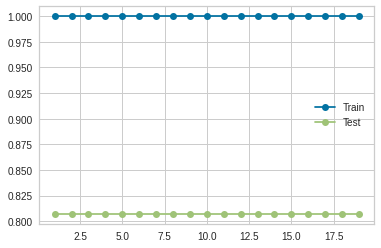

In [ ]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

feature importance

In [ ]:
df_fi = pd.DataFrame(zip(X_train.columns, etc.feature_importances_), columns = ['Features', 'Importance'])
df_fi.sort_values(by="Importance", ascending=False)


,Features,Importance
0,glucose,0.207530
3,insulin,0.155962
6,age,0.149876
2,skinthickness,0.138875
4,bmi,0.130578
5,diabetespedigreefunction,0.119942
1,bloodpressure,0.097236


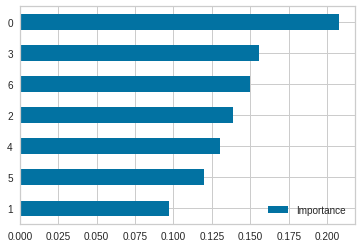

In [ ]:
df_fi.sort_values("Importance", ascending = True).plot.barh()

# Model Testing

In [ ]:
y_pred = etc.predict(X_test)
y_pred_proba = etc.predict_proba(X_test)[::, -1]
X_result = X_test.copy()
X_result['ProbaDiabet'] = y_pred_proba
X_result['PredictedDiabet'] = y_pred

In [ ]:
X_result

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,ProbaDiabet,PredictedDiabet
158,0.203947,0.408163,0.377778,0.106101,0.235174,0.262826,0.279070,0.04,0.0
497,0.953947,0.877551,0.533333,0.459947,0.210634,0.541854,0.372093,0.82,1.0
395,0.414474,0.653061,0.680000,0.336340,0.380368,0.584158,0.232558,0.64,1.0
155,0.592105,0.469388,0.355556,0.305040,0.351738,0.417642,0.186047,0.48,0.0
321,0.796053,0.653061,0.595556,0.490186,0.249489,0.201620,0.651163,0.63,1.0
...,...,...,...,...,...,...,...,...,...
24,0.664474,0.591837,0.266667,0.251989,0.081800,0.150315,0.837209,0.30,0.0
218,0.309211,0.469388,0.555556,0.193634,0.304703,0.331233,0.023256,0.13,0.0
430,0.460526,0.530612,0.222222,0.251989,0.114519,0.349235,0.232558,0.31,0.0
281,0.453947,0.265306,0.066667,0.185676,0.231084,0.493249,0.093023,0.16,0.0


In [ ]:
X_result[X_result['PredictedDiabet'] == 1]

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,ProbaDiabet,PredictedDiabet
497,0.953947,0.877551,0.533333,0.459947,0.210634,0.541854,0.372093,0.82,1.0
395,0.414474,0.653061,0.680000,0.336340,0.380368,0.584158,0.232558,0.64,1.0
321,0.796053,0.653061,0.595556,0.490186,0.249489,0.201620,0.651163,0.63,1.0
212,0.835526,0.489796,0.733333,0.819098,0.519427,0.360936,0.116279,0.83,1.0
409,0.861842,0.387755,0.511111,0.384085,0.314928,0.120612,0.395349,0.75,1.0
328,0.677632,0.510204,0.400000,0.737401,0.341513,0.276328,0.209302,0.63,1.0
534,0.440789,0.612245,0.733333,0.371353,0.584867,0.762376,0.558140,0.72,1.0
574,0.394737,0.489796,0.555556,0.285942,0.265849,0.348335,0.395349,0.54,1.0
575,0.394737,0.510204,0.617778,0.287533,0.216769,0.067507,0.627907,0.52,1.0
647,0.848684,0.551020,0.711111,0.450928,0.319018,0.802880,0.232558,0.91,1.0


In [ ]:
X_result[(X_result['PredictedDiabet'] == 1) & (X_result['ProbaDiabet'] >= 0.6)]

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,ProbaDiabet,PredictedDiabet
497,0.953947,0.877551,0.533333,0.459947,0.210634,0.541854,0.372093,0.82,1.0
395,0.414474,0.653061,0.680000,0.336340,0.380368,0.584158,0.232558,0.64,1.0
321,0.796053,0.653061,0.595556,0.490186,0.249489,0.201620,0.651163,0.63,1.0
212,0.835526,0.489796,0.733333,0.819098,0.519427,0.360936,0.116279,0.83,1.0
409,0.861842,0.387755,0.511111,0.384085,0.314928,0.120612,0.395349,0.75,1.0
328,0.677632,0.510204,0.400000,0.737401,0.341513,0.276328,0.209302,0.63,1.0
534,0.440789,0.612245,0.733333,0.371353,0.584867,0.762376,0.558140,0.72,1.0
647,0.848684,0.551020,0.711111,0.450928,0.319018,0.802880,0.232558,0.91,1.0
76,0.611842,0.857143,0.671111,0.293369,0.625767,0.134113,0.372093,0.61,1.0
90,0.513158,0.673469,0.977778,0.543767,0.644172,0.222322,0.232558,0.76,1.0


In [ ]:
y_pred = etc.predict(X_test)
y_pred_proba = etc.predict_proba(X_test)[::, -1]
X_result = df.iloc[X_test.index,:].copy()
X_result['ProbaDiabet'] = y_pred_proba
X_result['PredictedDiabet'] = y_pred

In [ ]:
X_result[(X_result['PredictedDiabet'] == 1) & (X_result['ProbaDiabet'] >= 0.5)]


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,ProbaDiabet,PredictedDiabet
549,4,189.0,110.0,31.0,188.4,28.5,0.680,37.0,0,0.82,1.0
439,6,107.0,88.0,37.6,141.8,36.8,0.727,31.0,0,0.64,1.0
355,9,165.0,88.0,33.8,199.8,30.4,0.302,49.0,1,0.63,1.0
235,4,171.0,72.0,40.0,323.8,43.6,0.479,26.0,1,0.83,1.0
455,14,175.0,62.0,30.0,159.8,33.6,0.212,38.0,1,0.75,1.0
364,4,147.0,74.0,25.0,293.0,34.9,0.385,30.0,0,0.63,1.0
590,11,111.0,84.0,40.0,155.0,46.8,0.925,45.0,1,0.72,1.0
635,13,104.0,72.0,32.0,122.8,31.2,0.465,38.0,1,0.54,1.0
636,5,104.0,74.0,34.8,123.4,28.8,0.153,48.0,0,0.52,1.0
716,3,173.0,78.0,39.0,185.0,33.8,0.970,31.0,1,0.91,1.0


In [ ]:
X_result.head(10)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,ProbaDiabet,PredictedDiabet
174,2,75.0,64.0,24.0,55.0,29.7,0.370,33.0,0,0.04,0.0
549,4,189.0,110.0,31.0,188.4,28.5,0.680,37.0,0,0.82,1.0
439,6,107.0,88.0,37.6,141.8,36.8,0.727,31.0,0,0.64,1.0
171,6,134.0,70.0,23.0,130.0,35.4,0.542,29.0,1,0.48,0.0
355,9,165.0,88.0,33.8,199.8,30.4,0.302,49.0,1,0.63,1.0
235,4,171.0,72.0,40.0,323.8,43.6,0.479,26.0,1,0.83,1.0
262,4,95.0,70.0,32.0,80.6,32.1,0.612,24.0,0,0.18,0.0
322,0,124.0,70.0,20.0,109.6,27.4,0.254,36.0,1,0.29,0.0
334,1,95.0,60.0,18.0,58.0,23.9,0.260,22.0,0,0.00,0.0
397,0,131.0,66.0,40.0,222.8,34.3,0.196,22.0,1,0.26,0.0


In [ ]:
X_result[(X_result['PredictedDiabet'] == 1) & (X_result['ProbaDiabet'] >= 0.5)].describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,ProbaDiabet,PredictedDiabet
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,6.111111,146.611111,78.350000,33.833333,198.650000,36.358333,0.467583,36.916667,0.722222,0.671111,1.0
std,3.785520,24.635953,13.526471,7.762253,71.154165,7.289146,0.264786,8.466320,0.454257,0.109591,0.0
min,0.000000,104.000000,56.000000,18.000000,105.000000,23.300000,0.088000,22.000000,0.000000,0.520000,1.0
25%,4.000000,128.000000,70.300000,30.000000,144.050000,31.000000,0.265500,30.750000,0.000000,0.595000,1.0
50%,6.000000,150.500000,75.500000,34.300000,186.700000,34.250000,0.405000,37.500000,1.000000,0.640000,1.0
75%,8.250000,166.000000,84.000000,39.250000,221.200000,42.600000,0.603250,44.250000,1.000000,0.752500,1.0
max,14.000000,189.000000,114.000000,51.000000,370.000000,49.700000,1.114000,54.000000,1.000000,0.910000,1.0


In [ ]:
from google.colab import drive
drive.mount('drive')

X_result.to_csv('diabetes.csv', sep=';', encoding='utf-8')


df.to_csv('df_diabetes.csv', sep=';', encoding='utf-8')

!cp diabetes.csv "drive/MyDrive/Colab Notebooks/csv"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
